In [16]:
#Importing Libraries
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Loading the input files with movie review data
movie_reviews = []

for line in open('full_train.txt', 'r'):
  movie_reviews.append(line.strip())

In [0]:
#Preprocessing the data
SPECIAL_CHARACTERS = re.compile("[.;:!\'?,\"()\[\]]")
HTML_CHARACTERS = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

In [0]:
#Function to remove special and HTML characters
def preprocess_data(reviews):
  reviews = [SPECIAL_CHARACTERS.sub("", line.lower()) for line in reviews]
  reviews = [HTML_CHARACTERS.sub(" ", line) for line in reviews]
  return reviews

In [0]:
#Preprocessing the data
processed_movie_reviews = preprocess_data(movie_reviews)

In [0]:
#Normalization

#Stemming
def get_stemmed_text(corpus):
  stemmer = PorterStemmer()
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

#Lemmatization
def get_lemmatized_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]


In [0]:
#Stemming and Lemmatization of the data
#movie_reviews = get_stemmed_text(processed_movie_reviews)
movie_reviews = get_lemmatized_text(processed_movie_reviews)

In [0]:
X = movie_reviews

In [0]:
#Data is merged to a single file with both positive and negative reviews where first 12500 is Positive and the rest 12500 Negative
y = [1 if i < 12500 else 0 for i in range(25000)]

In [0]:
#Splitting the data into train and test with 80% train and 20% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [0]:
#Vectorizing the string feature using tf - idf vectorizer
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'))
X = X_train + X_test
vectorizer.fit(X)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [18]:
#Naive approach - Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
lr.score(X_test, y_test)

0.8886

In [19]:
from sklearn.model_selection import cross_val_score
#100-fold cross validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=100)
#print accuracy for each classified data
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.86  0.885 0.85  0.895 0.9   0.89  0.895 0.9   0.89  0.91  0.88  0.87
 0.895 0.92  0.86  0.85  0.895 0.885 0.915 0.905 0.915 0.91  0.86  0.9
 0.885 0.875 0.88  0.84  0.89  0.895 0.875 0.865 0.88  0.885 0.875 0.885
 0.865 0.895 0.87  0.88  0.855 0.895 0.885 0.91  0.905 0.9   0.865 0.905
 0.905 0.87  0.91  0.875 0.88  0.86  0.875 0.865 0.875 0.885 0.875 0.87
 0.92  0.87  0.89  0.86  0.87  0.905 0.885 0.93  0.9   0.88  0.9   0.885
 0.885 0.9   0.93  0.88  0.9   0.9   0.905 0.865 0.84  0.875 0.88  0.895
 0.905 0.88  0.92  0.875 0.89  0.9   0.865 0.9   0.87  0.895 0.9   0.865
 0.925 0.9   0.92  0.88 ]
cv_scores mean:0.8868


Convolution Neural Network Model

In [0]:
#Data for Neural Network
X_NN = movie_reviews
y_NN = [1 if i < 12500 else 0 for i in range(25000)]

In [21]:
#Code to find the number of vocabularies in the dataset ignoring the case
wordfreq = []
for sentence in movie_reviews:
    texts = [word.lower() for word in sentence.split()]
    for i in texts:
      wordfreq.append(i.lower())

print("Number of Vocabulary in the dataset: ",len(set(wordfreq)))

Number of Vocabulary in the dataset:  86577


In [0]:
vocab_size = len(set(wordfreq))

In [23]:
length = -1
i = 0
avg = 0
for text in X_NN:
    leng = len(text.split())
    avg+= leng
if length < leng:
  length = leng
  i = i + 1

print(length)

138


In [24]:
input_length = round(avg/len(X))
input_length

233

In [0]:
#Preprocessing the data 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_NN)
X_NN = tokenizer.texts_to_sequences(X_NN)

X_NN = pad_sequences(X_NN,padding='post',maxlen=1024)

In [0]:
#Splitting the data into train and test with 80% train and 20% as test data
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_NN, y_NN, random_state = 42, test_size = 0.2)

In [0]:
y_test_NN = np.array(y_test_NN)
y_train_NN = np.array(y_train_NN)

In [28]:
type(X_test_NN)

numpy.ndarray

In [0]:
model = tf.keras.Sequential()
 
# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(layers.Embedding(vocab_size, 50, input_length = input_length))
model.add(layers.Dropout(0.2))
 
# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(layers.Conv1D(250,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
 
# we use max pooling:
model.add(layers.GlobalMaxPooling1D())
 
# We add a vanilla hidden layer:
model.add(layers.Dense(250))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('relu'))
 
# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))


In [0]:
#Compiler with loss mse and optimizer sgd
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

In [31]:
#Model fit method
history = model.fit(X_train_NN, y_train_NN, epochs=100,
                    validation_data=(X_test_NN, y_test_NN), batch_size = 128)

Epoch 1/100
157/157 [==============================] - 5s 31ms/step - loss: 0.2501 - accuracy: 0.4964 - val_loss: 0.2500 - val_accuracy: 0.5030
Epoch 2/100
157/157 [==============================] - 5s 29ms/step - loss: 0.2500 - accuracy: 0.5064 - val_loss: 0.2499 - val_accuracy: 0.5040
Epoch 3/100
157/157 [==============================] - 5s 29ms/step - loss: 0.2498 - accuracy: 0.5092 - val_loss: 0.2497 - val_accuracy: 0.5030
Epoch 4/100
157/157 [==============================] - 5s 29ms/step - loss: 0.2498 - accuracy: 0.5141 - val_loss: 0.2496 - val_accuracy: 0.5322
Epoch 5/100
157/157 [==============================] - 5s 29ms/step - loss: 0.2497 - accuracy: 0.5191 - val_loss: 0.2495 - val_accuracy: 0.5744
Epoch 6/100
157/157 [==============================] - 5s 29ms/step - loss: 0.2495 - accuracy: 0.5246 - val_loss: 0.2493 - val_accuracy: 0.5030
Epoch 7/100
157/157 [==============================] - 5s 29ms/step - loss: 0.2494 - accuracy: 0.5263 - val_loss: 0.2491 - val_accuracy:

In [32]:
#Code to evaluate model,Accuracy is  89% on validation dataset
loss, acc = model.evaluate(X_test_NN, y_test_NN)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

157/157 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.8884
Test Loss: 0.0812828540802002
Test Accuracy: 0.8884000182151794


In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


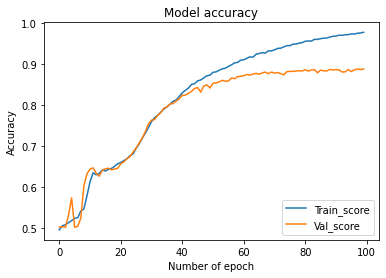

In [41]:
#Plot for Model Accuracy
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epoch')
plt.legend(['Train_score', 'Val_score'], loc='lower right')
plt.show()

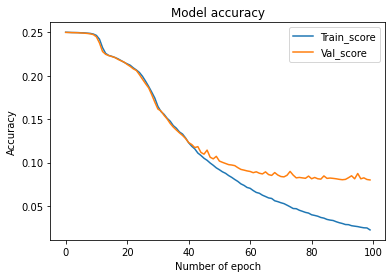

In [35]:
#Plot for Model Loss
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epoch')
plt.legend(['Train_score', 'Val_score'], loc='upper right')
plt.show()

Text(0.5, 1.0, 'Confusion matrix for model')

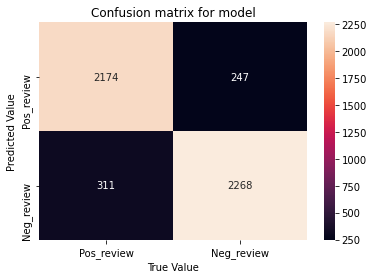

In [38]:
#Cofusion matrix for final model
from sklearn.metrics import confusion_matrix
import seaborn as sb
pred = model.predict_classes(X_test_NN)
LABELS = ['Pos_review','Neg_review']

cnf_matrix = confusion_matrix(pred, y_test_NN)
Hm = sb.heatmap(cnf_matrix, annot = True, fmt=".0f",xticklabels = LABELS, yticklabels = LABELS)
Hm.set(xlabel='True Value', ylabel='Predicted Value')
Hm.set_title('Confusion matrix for model')


cv_scores mean for LR:0.8868
cv_scores mean for CNN:0.7892840003967285


Text(0.5, 1.0, 'Comparison of Logistic Regression and CNN')

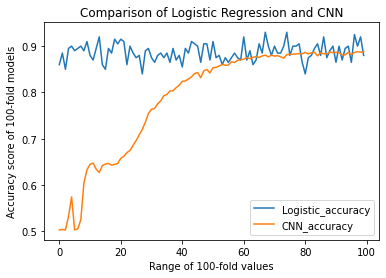

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
x = range(100)
plt.plot(x,cv_scores)
plt.plot(x,history.history['val_accuracy'])
plt.xlabel('Range of 100-fold values')
plt.ylabel('Accuracy score of 100-fold models')
plt.legend(['Logistic_accuracy', 'CNN_accuracy'])
plt.title('Comparison of Logistic Regression and CNN')